In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv', sep=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
df.shape

(100000, 9)

In [9]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

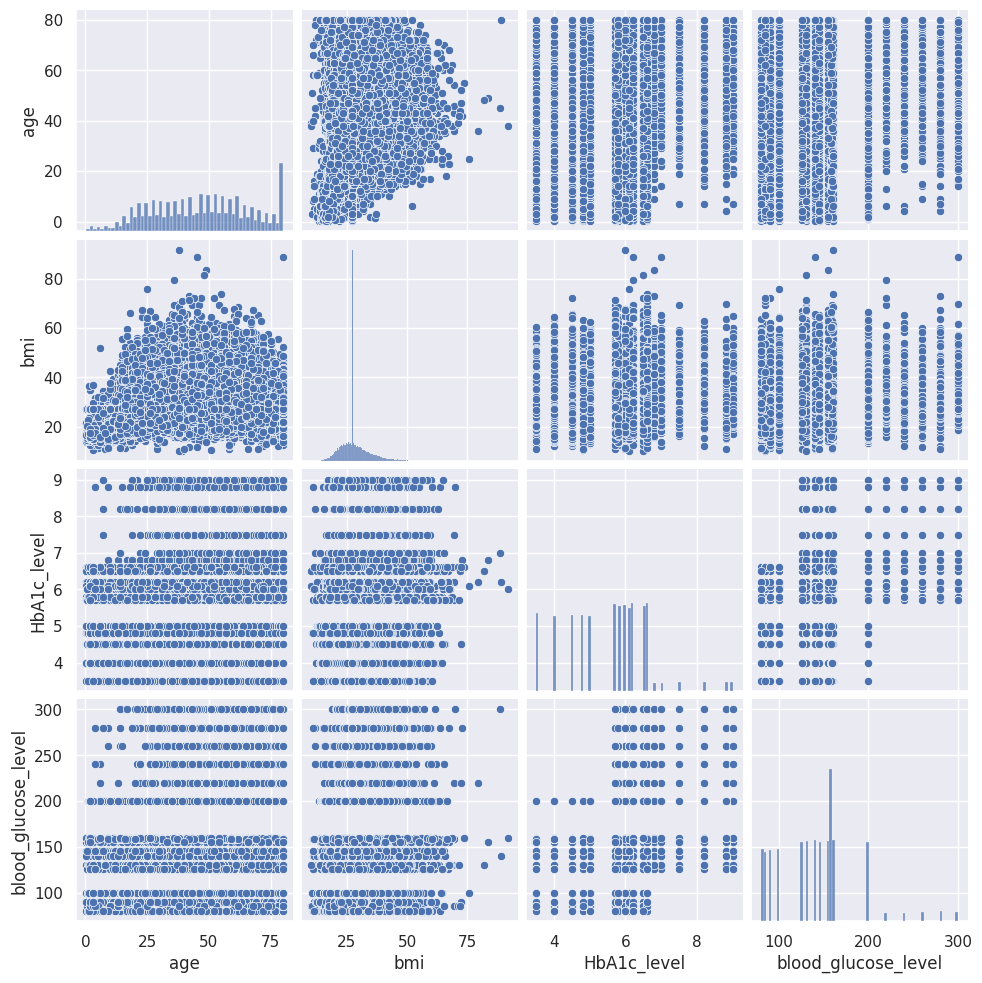

In [10]:
# Удалить людей без информации о курении
df.drop(df[df.smoking_history == 'No Info'].index, inplace=True)
numeric = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
sns.pairplot(df[numeric])

In [11]:
# Находим выброс в bmi
df['bmi_frequency'] = df.groupby('bmi')['bmi'].transform('count')
df.sort_values(['bmi_frequency', 'bmi'], inplace=True, ascending=[False, True])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_frequency
2,Male,28.0,0,0,never,27.32,5.7,158,0,12047
5,Female,20.0,0,0,never,27.32,6.6,85,0,12047
9,Female,32.0,0,0,never,27.32,5.0,100,0,12047
10,Female,53.0,0,0,never,27.32,6.1,85,0,12047
26,Male,67.0,0,1,not current,27.32,6.5,200,1,12047


In [12]:
# Находим выброс в blood_glucose_level
df['bg_frequency'] = df.groupby('blood_glucose_level')['blood_glucose_level'].transform('count')
df.sort_values(['bg_frequency', 'blood_glucose_level'], inplace=True, ascending=[False, True])
df.head()
# Получаем, что выброса в blood_glucose_level на самом деле нет

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_frequency,bg_frequency
179,Male,25.0,0,0,never,27.32,6.1,140,0,12047,5026
189,Female,77.0,0,0,never,27.32,6.5,140,0,12047,5026
258,Male,27.0,0,0,never,27.32,6.1,140,0,12047,5026
766,Female,23.0,0,0,never,27.32,6.0,140,0,12047,5026
908,Female,80.0,0,0,never,27.32,6.2,140,0,12047,5026


In [13]:
df.drop('bmi_frequency', axis=1, inplace=True)
df.drop('bg_frequency', axis=1, inplace=True)

In [14]:
# Удаляем выброс в возрасте
df.sort_values(['age'], ascending=False, inplace=True)
df.drop(index=df.index[:3350],  inplace=True)
df['age'].value_counts()

age
51.00    1198
49.00    1172
52.00    1168
53.00    1163
47.00    1151
         ... 
0.40        4
0.32        4
0.64        3
0.16        3
0.56        2
Name: count, Length: 101, dtype: int64

In [15]:
bmi_index_for_deleting = df[df.bmi == 27.32].index
df.drop(bmi_index_for_deleting[:11345], inplace=True)
df['bmi'].value_counts()

bmi
25.00    76
25.20    76
23.00    76
22.40    75
25.60    74
         ..
51.70     1
41.68     1
63.27     1
50.33     1
15.17     1
Name: count, Length: 3934, dtype: int64

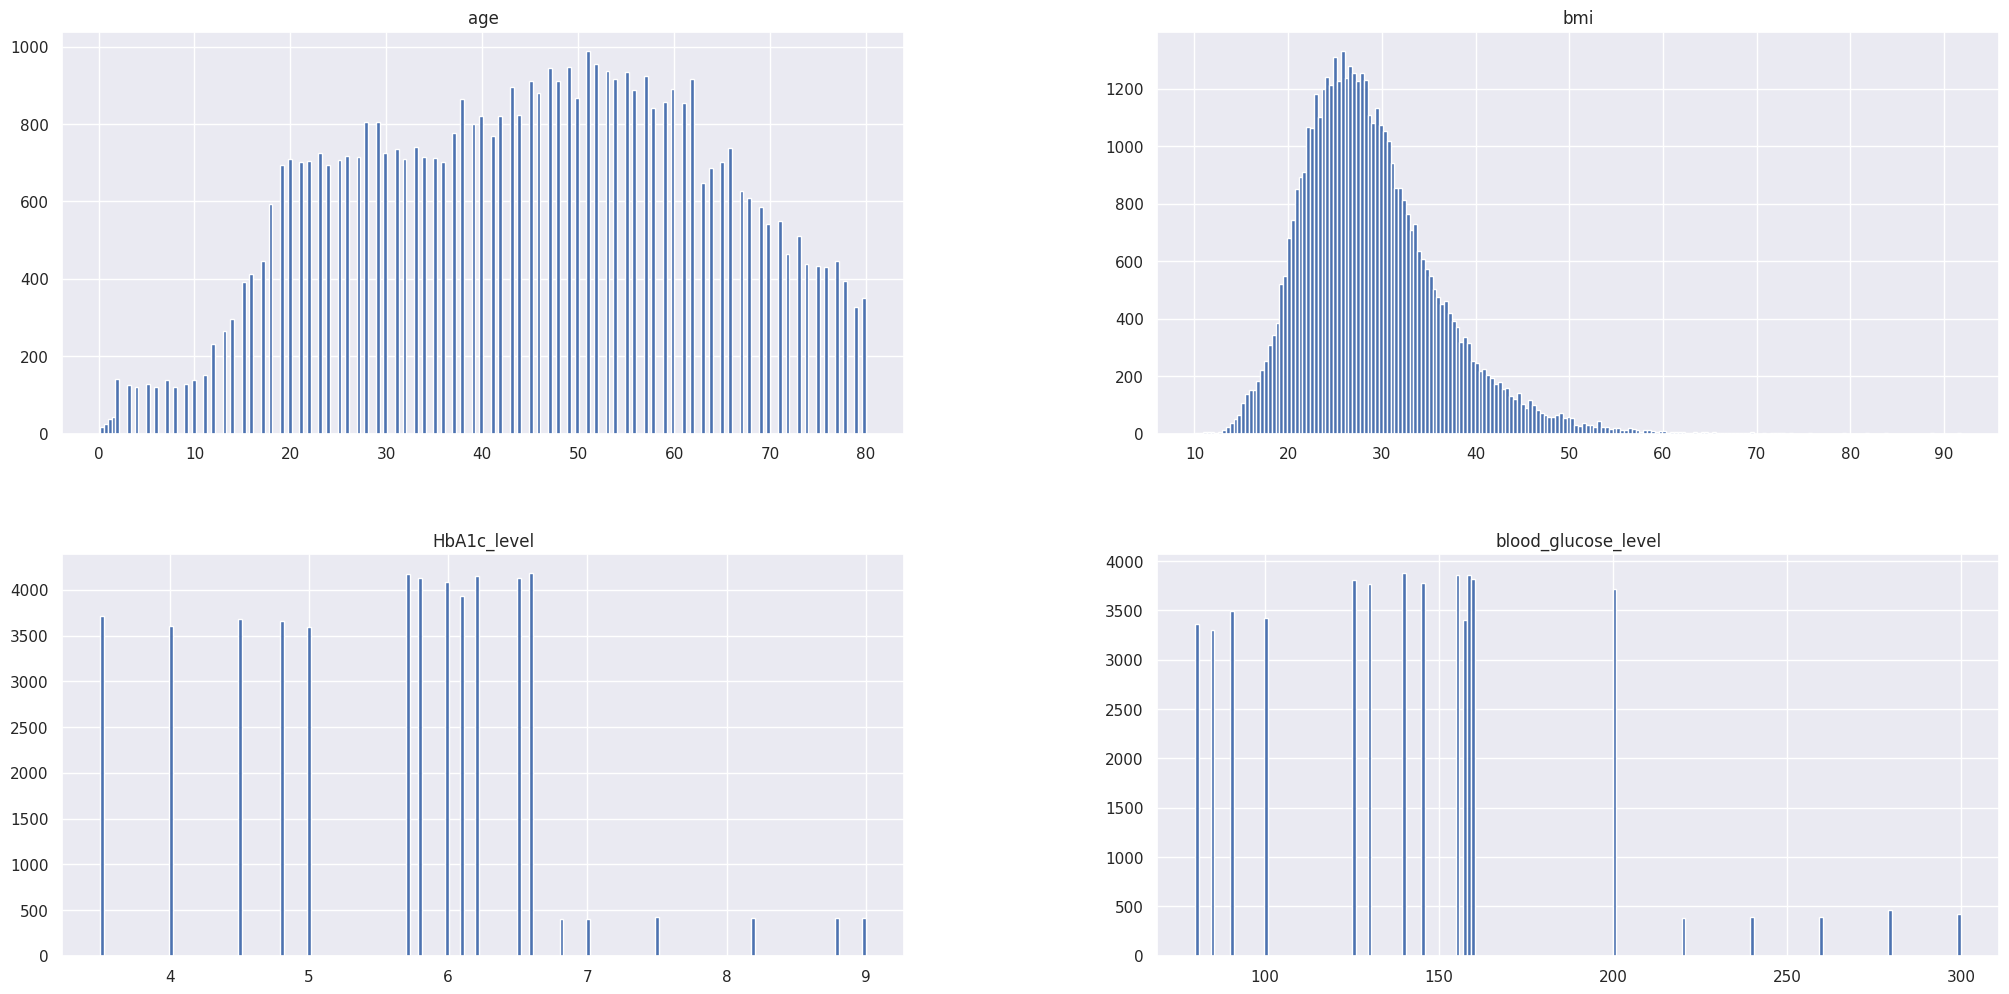

In [16]:
# Проверяем, что выбросы удалены
df[numeric].hist(figsize=(25,12), bins=200);

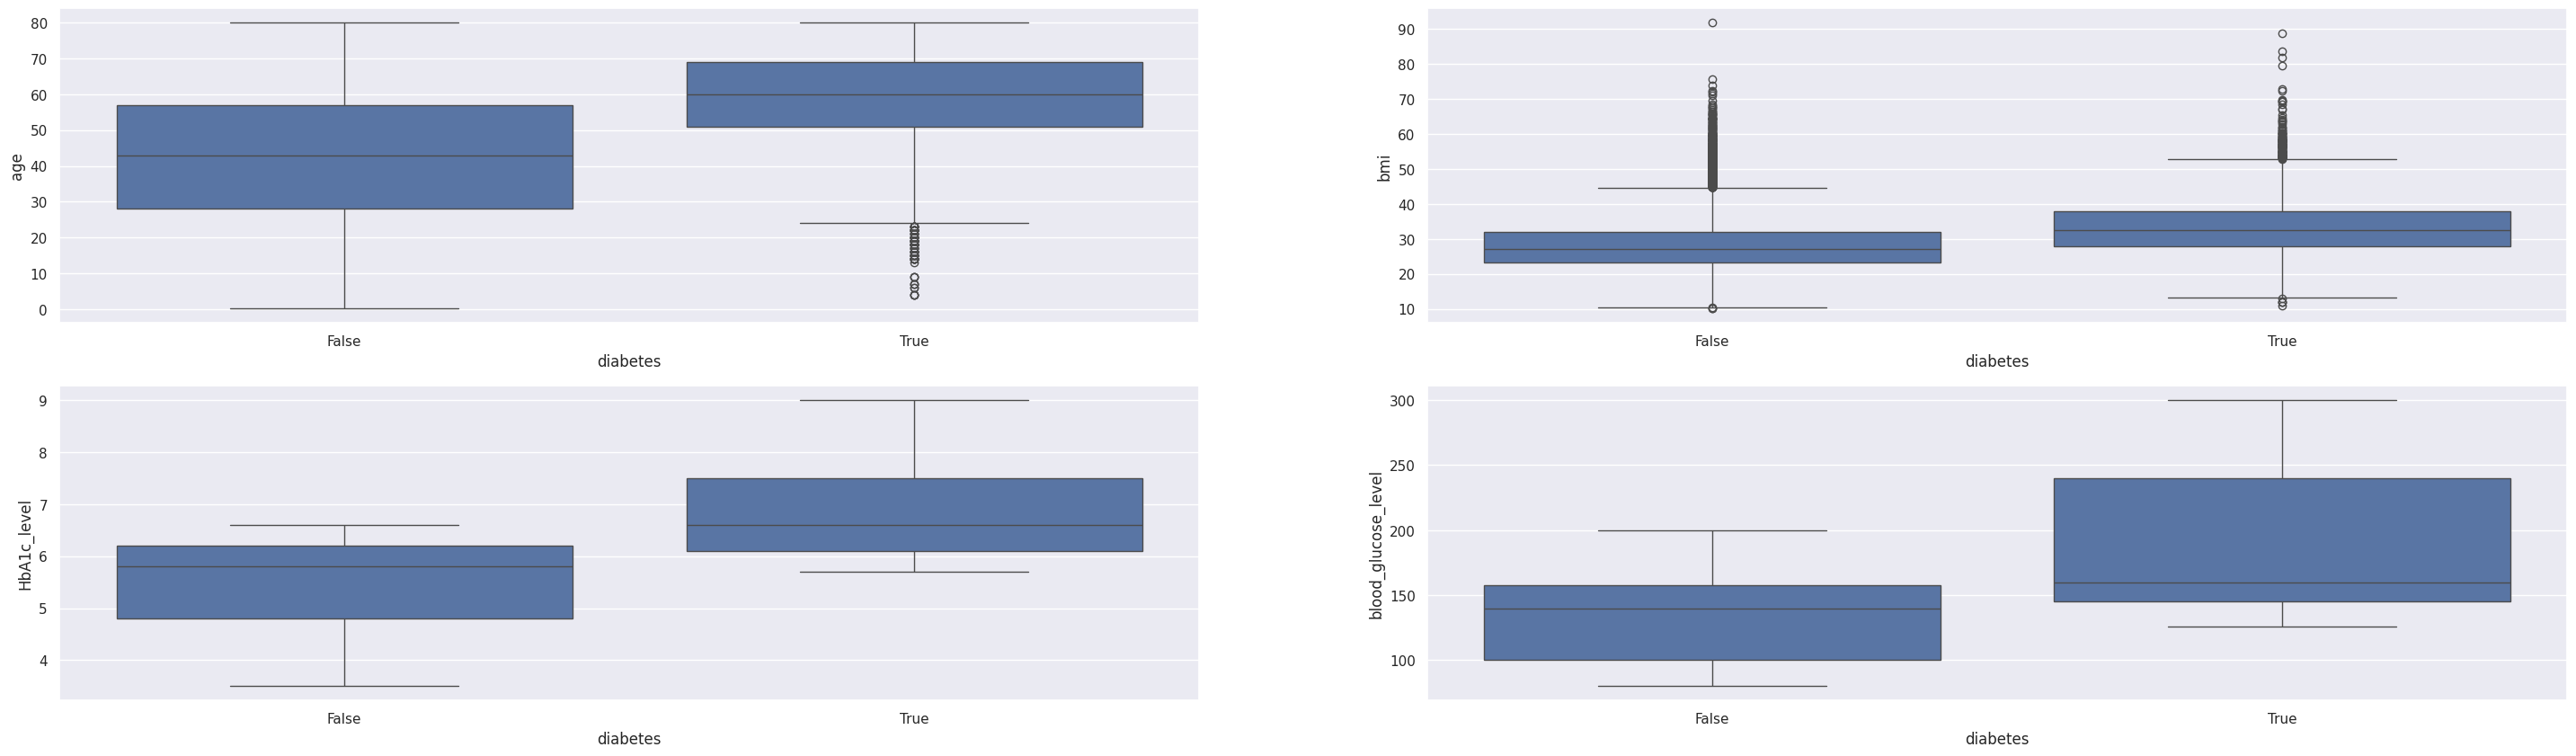

In [17]:
# Задание 2
# Как признаки связаны с целевым (диабет)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(36, 10))

df['diabetes'] = df['diabetes'].astype(bool)

for idx, feat in  enumerate(numeric):
    sns.boxplot(x='diabetes', y=feat, data=df, ax=axes[int(idx / 2), idx % 2])

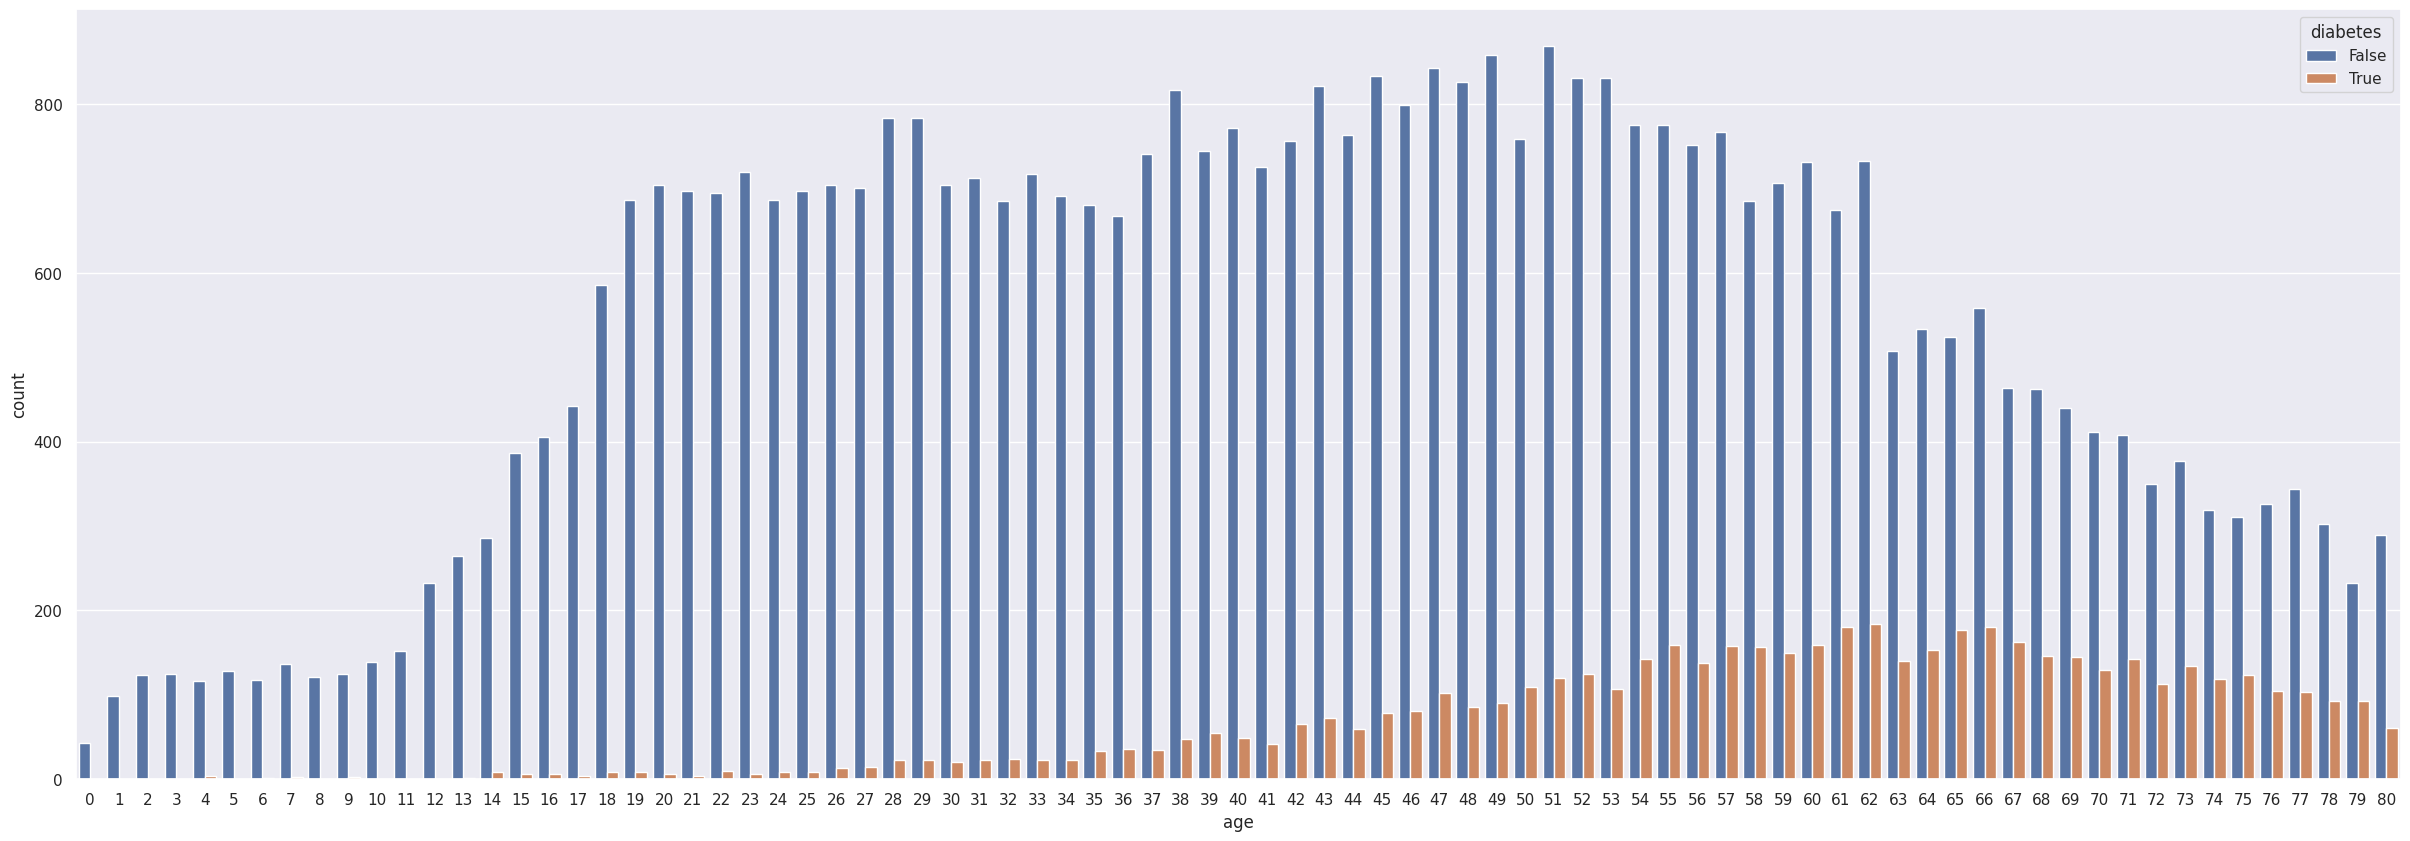

In [18]:
df['age'] = df['age'].astype('int64')
plt.figure(figsize=(30, 10))
sns.countplot(x='age', hue='diabetes', data=df);

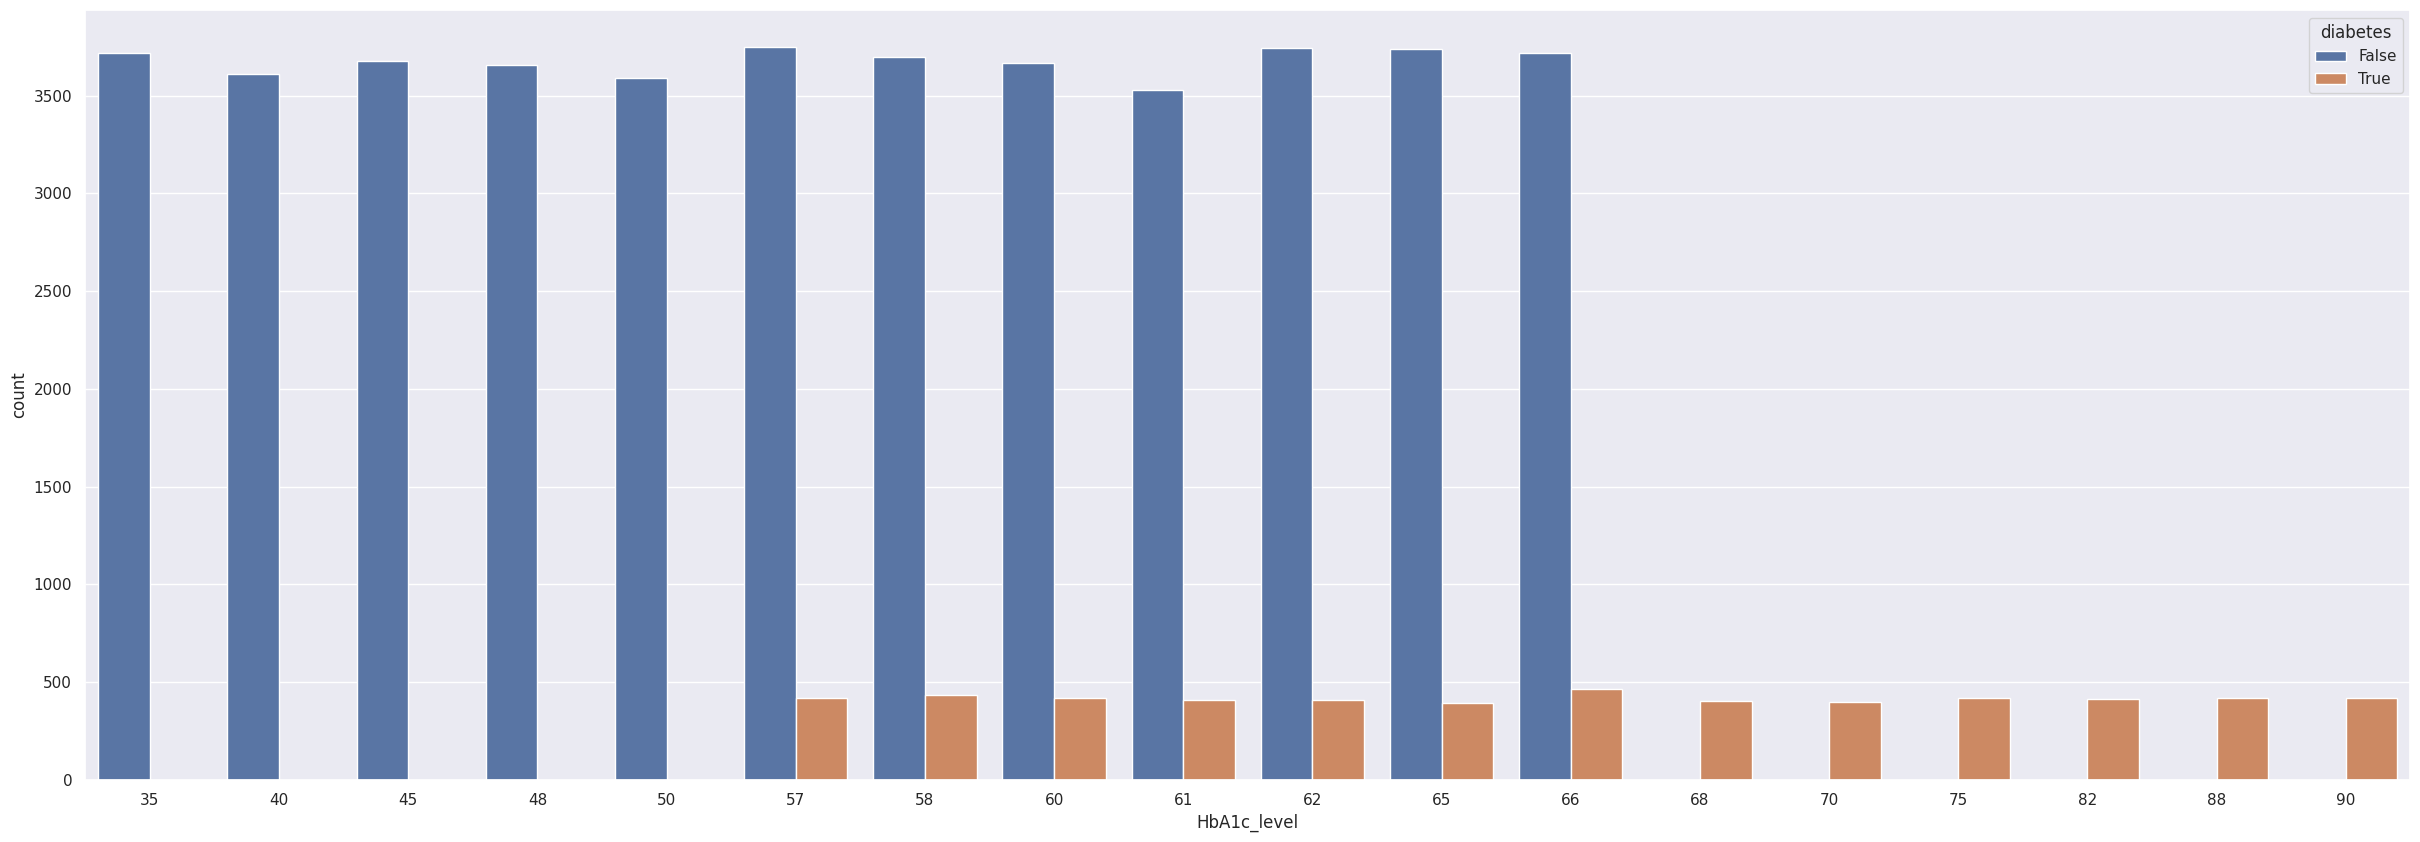

In [19]:
df_tmp = df.copy()
df_tmp['HbA1c_level'] = (df['HbA1c_level']*10).astype('int64')
plt.figure(figsize=(30, 10))
sns.countplot(x='HbA1c_level', hue='diabetes', data=df_tmp);

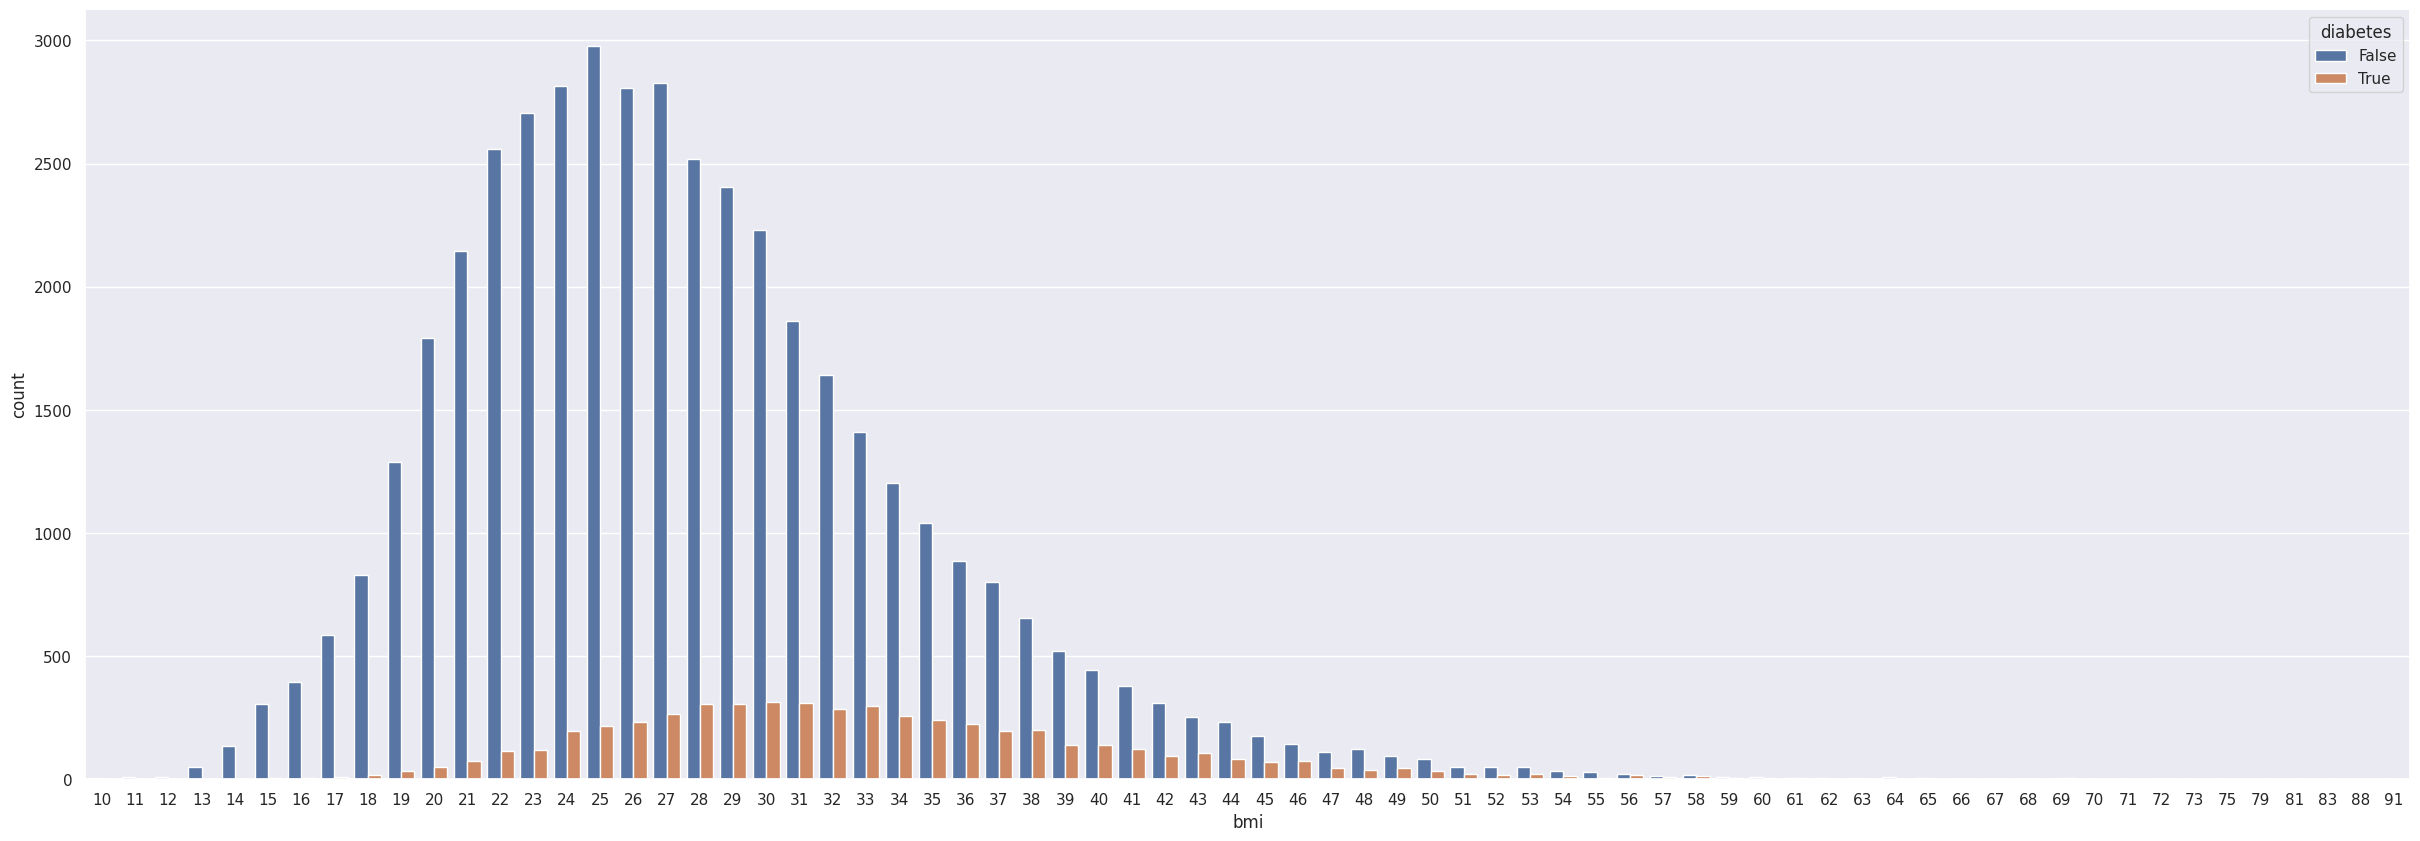

In [20]:
df_tmp['bmi'] = df['bmi'].astype('int64')
plt.figure(figsize=(30, 10))
sns.countplot(x='bmi', hue='diabetes', data=df_tmp);

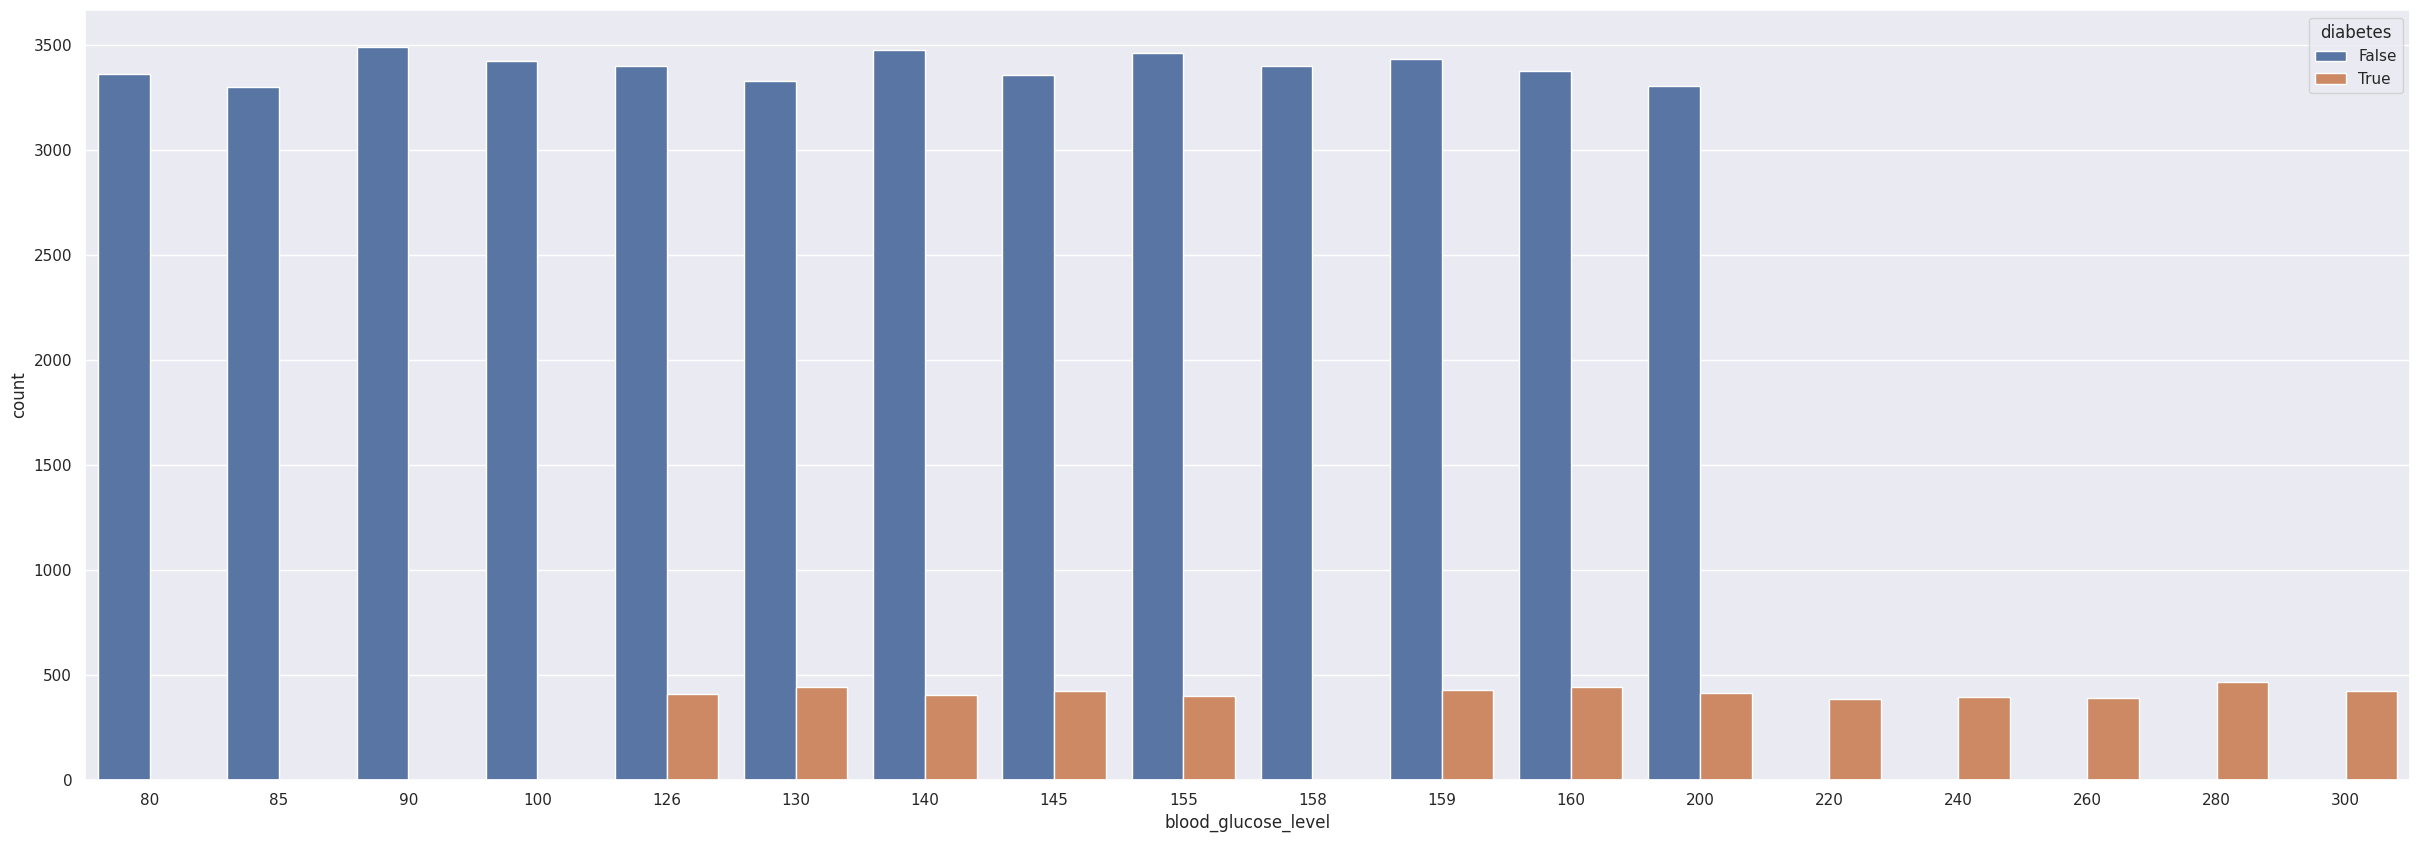

In [21]:
plt.figure(figsize=(30, 10))
sns.countplot(x='blood_glucose_level', hue='diabetes', data=df);

In [22]:
pd.crosstab(df['diabetes'], df['heart_disease'])

heart_disease,0,1
diabetes,,
False,42737,1354
True,4669,758


In [23]:
pd.crosstab(df['diabetes'], df['hypertension'])

hypertension,0,1
diabetes,,
False,40657,3434
True,4004,1423


In [24]:
pd.crosstab(df['diabetes'], df['smoking_history'], normalize='columns')

smoking_history,current,ever,former,never,not current
diabetes,,,,,
False,0.890531,0.881681,0.830765,0.908152,0.881376
True,0.109469,0.118319,0.169235,0.091848,0.118624


In [25]:
pd.crosstab(df['diabetes'], df['gender'], normalize='columns')

gender,Female,Male,Other
diabetes,,,
False,0.906236,0.865282,1.0
True,0.093764,0.134718,0.0


In [26]:
df.groupby(['smoking_history'])['diabetes'].agg(['mean']).sort_values(by='mean', ascending=False)

,mean
smoking_history,
former,0.169235
not current,0.118624
ever,0.118319
current,0.109469
never,0.091848


In [27]:
# Матрица корреляции Спирмена
df[numeric].corr(method='spearman')

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.253146,0.104252,0.080194
bmi,0.253146,1.000000,0.076607,0.072262
HbA1c_level,0.104252,0.076607,1.000000,0.110090
blood_glucose_level,0.080194,0.072262,0.110090,1.000000


<Axes: >

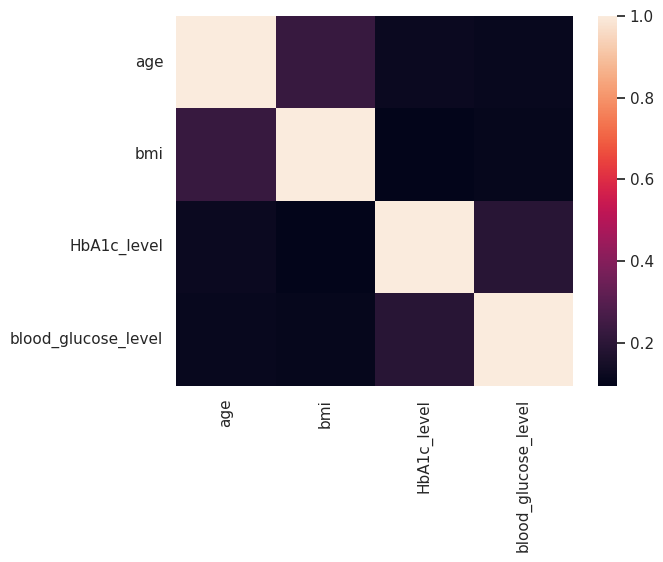

In [28]:
sns.heatmap(df[numeric].corr())